### **Estimación de calidad de vinos utilizando técnicas de machine learning**

Se utiliza un dataset que contiene información detallada sobre las características fisico-químicas del vino. Las características incluyen acidez fija, acidez volátil, ácido cítrico, azúcar residual, cloruros, dióxido de azufre libre, dióxido de azufre total, densidad, pH, sulfatos y alcohol. La calidad del vino está clasificada en una escala del 0 al 10. Mediante técnicas de machine learning y aplicando PCA se busca predecir la calidad de un vino dado.


Dataset disponible en: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

### **1. Importación de librerias y dataset**

In [70]:
# librerias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
from sklearn.decomposition import PCA

In [71]:
# dataset
df = pd.read_csv('winequality-red.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### **2. Análisis de los datos**

In [72]:
# info del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [73]:
# tipos de datos del dataframe
print("Los tipos de datos del dataframe son:")
print(df.dtypes)

Los tipos de datos del dataframe son:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


Los datos del dataset son todos del tipo numerico.

In [74]:
# shape
df.shape

(1599, 12)

El dataset cuenta con 1599 filas y 12 columnas

In [75]:
# estadisticas del dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Identificación de valores faltantes, outliers y duplicados.

In [77]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
fixed acidity,1599,0,0.0
volatile acidity,1599,0,0.0
citric acid,1599,0,0.0
residual sugar,1599,0,0.0
chlorides,1599,0,0.0
free sulfur dioxide,1599,0,0.0
total sulfur dioxide,1599,0,0.0
density,1599,0,0.0
pH,1599,0,0.0
sulphates,1599,0,0.0


El dataset no cuenta con datos faltantes.

In [78]:
# valores duplicados
df.duplicated().sum()

240

Se tienen 240 datos duplicados que se proceden a borrar.

In [79]:
# eliminar duplicados
df = df.drop_duplicates()

In [80]:
# valores duplicados
df.duplicated().sum()

0

A continuacion se visualiza la distribucion de las variables.

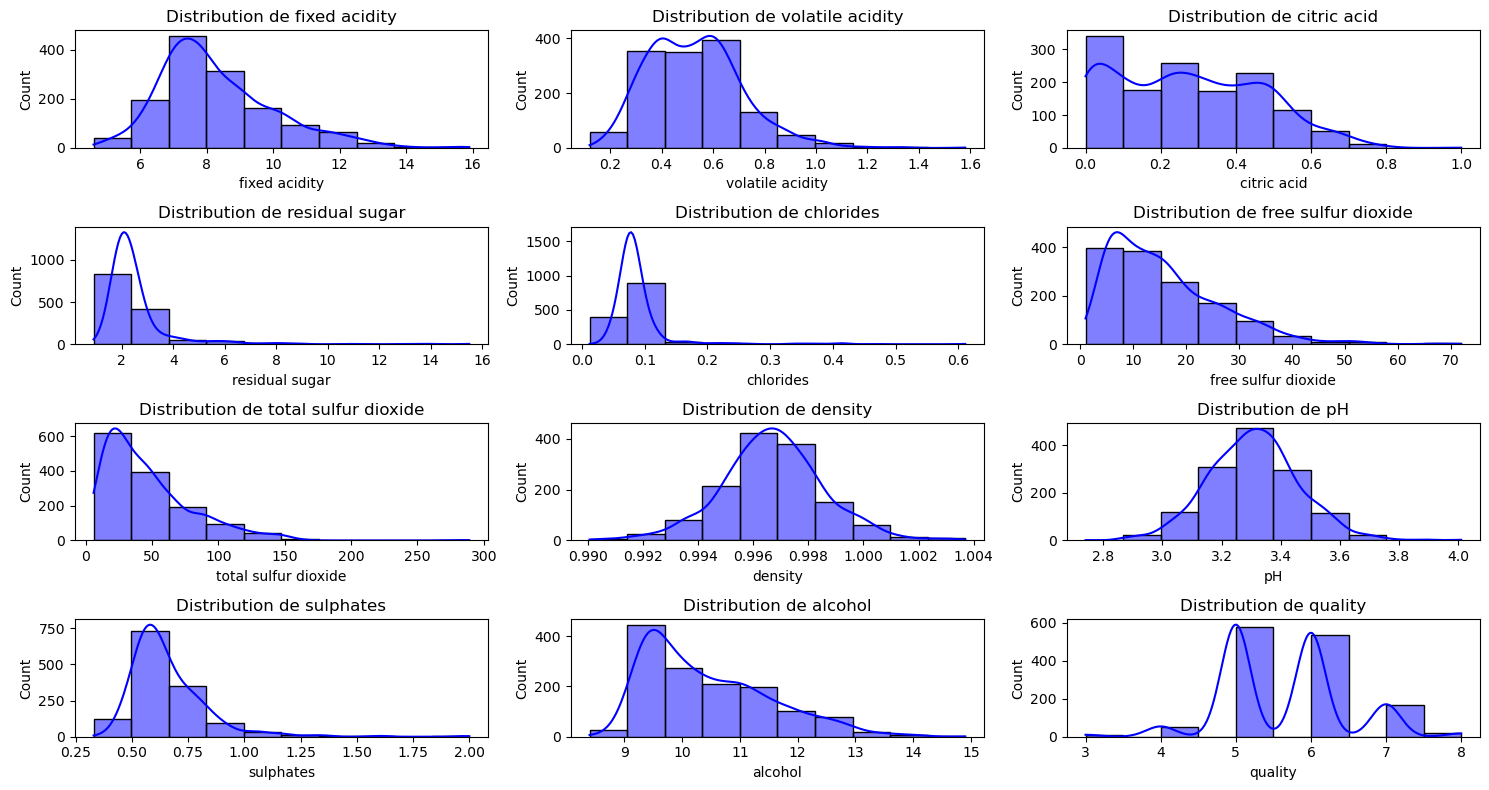

In [81]:
# numericas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# numero de columnas y filas
cols = 3
filas = (len(numerical_columns) // cols) + (len(numerical_columns) % cols > 0)

# distribucion de los datos
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    # ajusta segun la cantidad de columnas
    plt.subplot(filas, cols, i) 
    sns.histplot(df[col], kde=True, color="blue", bins=10)  
    plt.title(f"Distribution de {col}")
    plt.tight_layout()

plt.show()

Segun la distribucion de los datos en las columnas numericas algunas variables siguen una distribucion normal, como lo es el caso de la densidad y el ph, mientras que las demás variables se encuentran sesgadas a la derecha.

Se generan boxplots para las variables y asi identificar outliers.

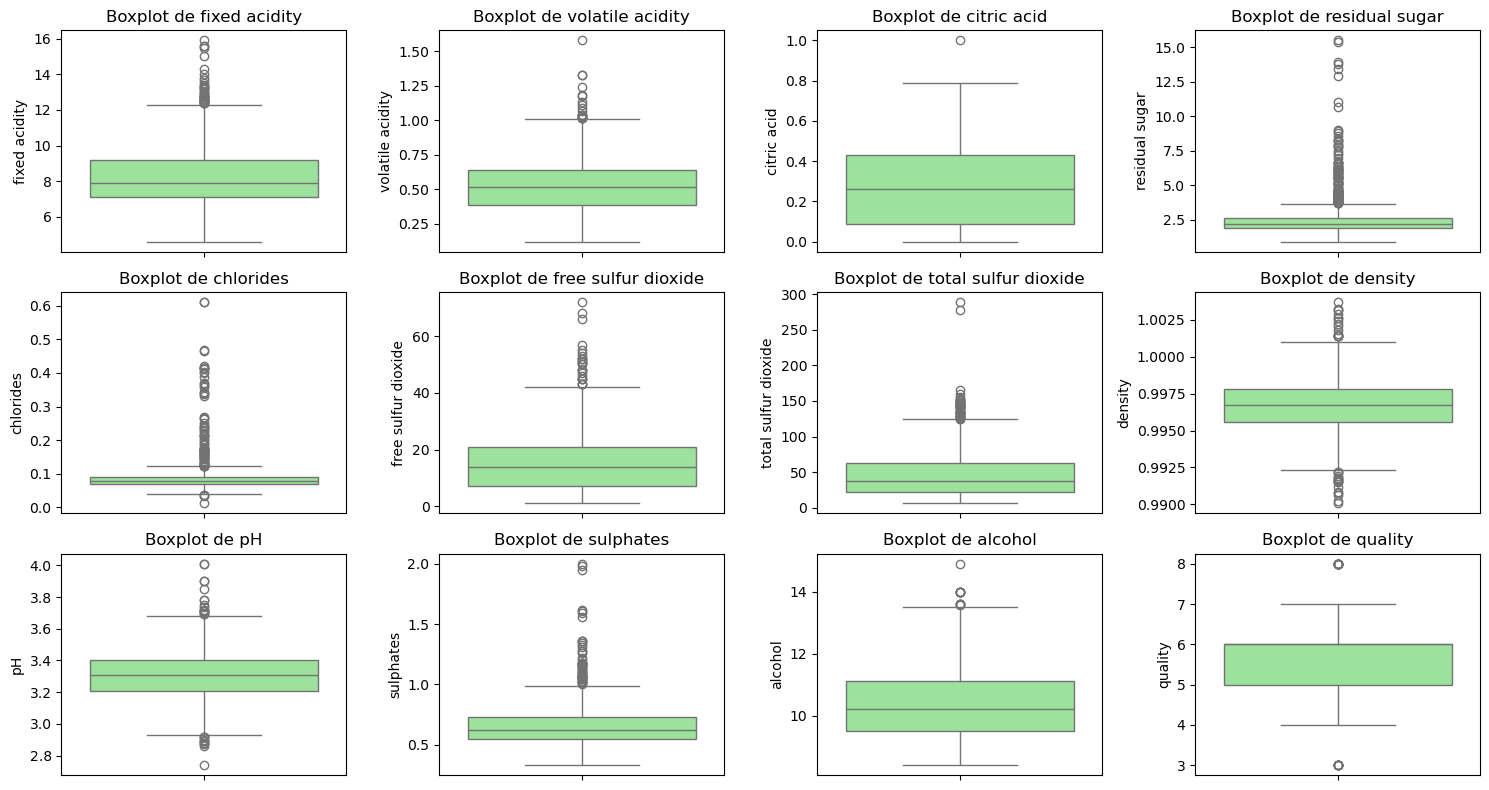

In [82]:
# numericas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# numero de columnas y filas
cols = 4
filas = (len(numerical_columns) // cols) + (len(numerical_columns) % cols > 0)

# crear boxplots 
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    # ajusta segun la cantidad de columnas
    plt.subplot(filas, cols, i)  
    sns.boxplot(y=df[col], color="lightgreen")
    plt.title(f"Boxplot de {col}")
    plt.tight_layout()

plt.show()

Se ve una gran cantidad de outliers en los datos. A continuación se procede a analizar los outliers en las columnas.

In [83]:
# unicos en fixed acidity
df['fixed acidity'].unique()

array([ 7.4,  7.8, 11.2,  7.9,  7.3,  7.5,  6.7,  5.6,  8.9,  8.5,  8.1,
        7.6,  6.9,  6.3,  7.1,  8.3,  5.2,  5.7,  8.8,  6.8,  4.6,  7.7,
        8.7,  6.4,  6.6,  8.6, 10.2,  7. ,  7.2,  9.3,  8. ,  9.7,  6.2,
        5. ,  4.7,  8.4, 10.1,  9.4,  9. ,  8.2,  6.1,  5.8,  9.2, 11.5,
        5.4,  9.6, 12.8, 11. , 11.6, 12. , 15. , 10.8, 11.1, 10. , 12.5,
       11.8, 10.9, 10.3, 11.4,  9.9, 10.4, 13.3, 10.6,  9.8, 13.4, 10.7,
       11.9, 12.4, 12.2, 13.8,  9.1, 13.5, 10.5, 12.6, 14. , 13.7,  9.5,
       12.7, 12.3, 15.6,  5.3, 11.3, 13. ,  6.5, 12.9, 14.3, 15.5, 11.7,
       13.2, 15.9, 12.1,  5.1,  4.9,  5.9,  6. ,  5.5])

In [84]:
# estadisticas
df['fixed acidity'].describe()

count    1359.000000
mean        8.310596
std         1.736990
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

In [85]:
def find_outliers(df, column_name):
    # cuartiles y iqr
    q1 = df[column_name].quantile(0.25) 
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1 
    
    # limites para los outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # filtrar los outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    
    # resultados
    return outliers, {"lower_bound": lower_bound, "upper_bound": upper_bound}

In [86]:
# outliers 
find_outliers(df,'fixed acidity')

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 205            12.8             0.300         0.74             2.6      0.095   
 243            15.0             0.210         0.44             2.2      0.075   
 264            12.5             0.560         0.49             2.4      0.064   
 294            13.3             0.340         0.52             3.2      0.094   
 328            13.4             0.270         0.62             2.6      0.082   
 338            12.4             0.490         0.58             3.0      0.103   
 339            12.5             0.280         0.54             2.3      0.082   
 347            13.8             0.490         0.67             3.0      0.093   
 353            13.5             0.530         0.79             4.8      0.120   
 359            12.6             0.380         0.66             2.6      0.088   
 363            12.5             0.460         0.63             2.0      0.071   
 364            

Se genera un mapa de calor para visualizar las correlaciones entre variables.

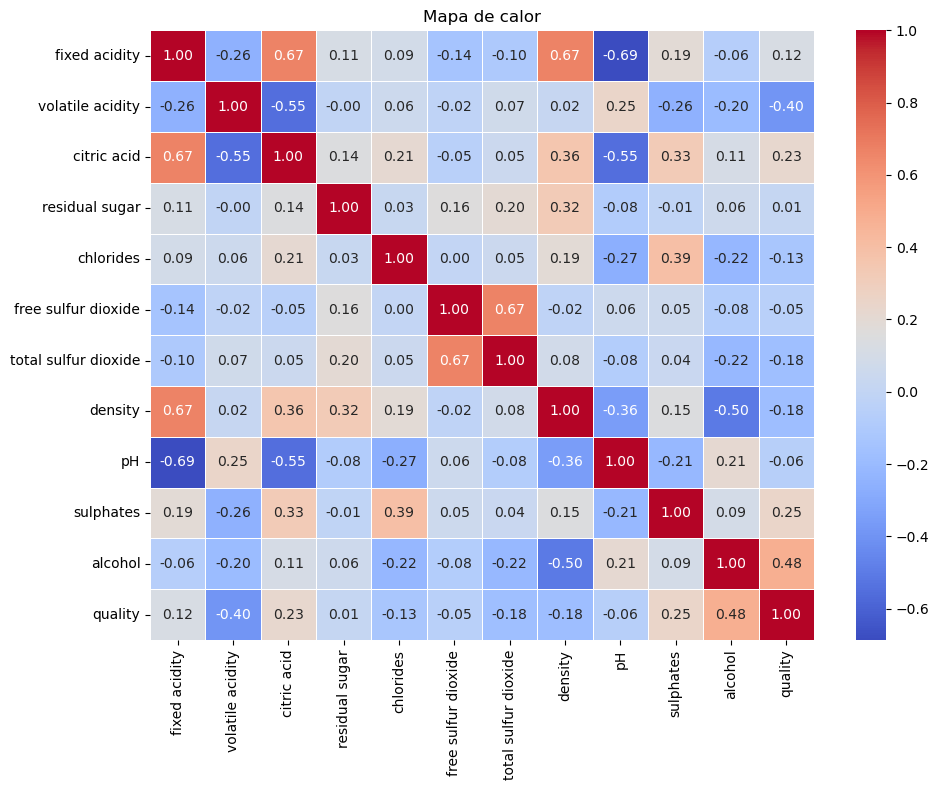

In [87]:
# numericas
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# matriz de correlación
correlation_matrix = numerical_columns.corr()

# mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de calor')
plt.tight_layout()
plt.show()

### **3. Preprocesamiento**

Se dividen los datos, siendo x las variables predictivas y y la variable target. En este caso particular, la variable target es quality y las restantes serán las predictivas.

In [88]:
# definicion de variables categoricas y target
x = df.drop(columns=['quality'])
y = df[['quality']]

Se dividen los datos en un conjunto de entrenamiento y test.

In [89]:
# split de los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [90]:
# escalamiento de los datos
scaler = StandardScaler()

In [91]:
# procesar las columnas
# fit transform para train
x_train_scaled = scaler.fit_transform(x_train)

# transform para test
x_test_scaled = scaler.transform(x_test)

### **4. Aplicación de modelos**

### **Modelo Decission trees Classifier**

Se realiza la predicción aplicando el modelo decission tree classifier.

In [92]:
# ajustar modelo
tree_model = DecisionTreeClassifier(
    random_state=42, 
    max_depth=5,  
    min_samples_split=10,  
    min_samples_leaf=5  
)
tree_model.fit(x_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [93]:
# realizar predicciones
y_pred = tree_model.predict(x_test_scaled)

In [94]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 0.5245098039215687
Informe de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.23      0.23      0.23        13
           5       0.68      0.49      0.57       172
           6       0.47      0.63      0.54       164
           7       0.45      0.48      0.47        50
           8       0.00      0.00      0.00         4

    accuracy                           0.52       408
   macro avg       0.31      0.30      0.30       408
weighted avg       0.54      0.52      0.52       408



c:\Users\Admin\miniconda3\envs\datascience\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\miniconda3\envs\datascience\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\miniconda3\envs\datascience\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [95]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[  0   2   1   2   0   0]
 [  0   3   3   7   0   0]
 [  0   5  84  80   3   0]
 [  0   3  34 103  24   0]
 [  0   0   1  25  24   0]
 [  0   0   0   2   2   0]]


In [96]:
# funcion para graficar la matriz de confusion
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Etiqueta predicha')
    plt.show()

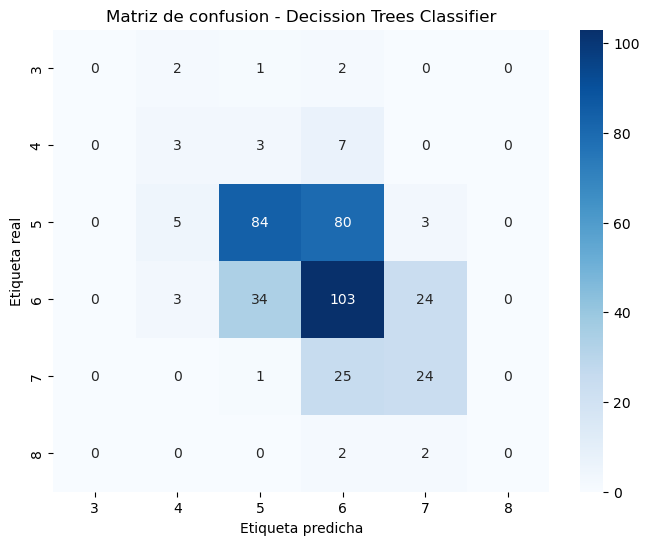

In [98]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion - Decission Trees Classifier")

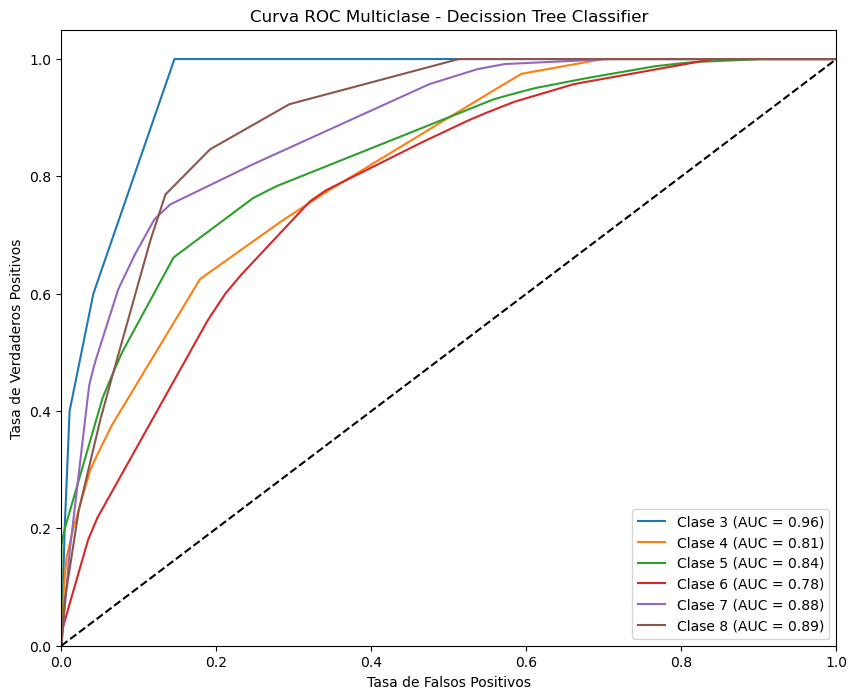

In [99]:
# curva roc para multiclase
# convertir a binario las etiquetas
y_train_bin = label_binarize(y_train, classes=classes) 
y_pred_prob = tree_model.predict_proba(x_train_scaled)

# graficar la curva 
plt.figure(figsize=(10, 8))

# curva roc para cada clase
for i in range(y_train_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_train_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Clase {classes[i]} (AUC = {roc_auc:.2f})')

# resultado
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Multiclase - Decission Tree Classifier')
plt.legend(loc='lower right')
plt.show()

### **Aplicando PCA**

Utilizando PCA, se busca reducir las caracteristicas a 4 componentes.

In [100]:
# aplicar PCA para reducir a 4 componentes principales
pca = PCA(n_components=4)

# aplicar al train
x_train_pca = pca.fit_transform(x_train_scaled)

# aplicar al test
x_test_pca = pca.transform(x_test_scaled)

Una vez aplicado el pca, se procede a aplicar el modelo de decission tree classifier.

In [101]:
# ajustar modelo
tree_model_pca = DecisionTreeClassifier(
    random_state=42, 
    max_depth=5,  
    min_samples_split=10,  
    min_samples_leaf=5 
)
tree_model_pca.fit(x_train_pca, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [103]:
# realizar predicciones
# sobre test 
y_pred_test_pca = tree_model_pca.predict(x_test_pca)

In [104]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred_test_pca)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 0.571078431372549
Informe de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.23      0.23      0.23        13
           5       0.68      0.49      0.57       172
           6       0.47      0.63      0.54       164
           7       0.45      0.48      0.47        50
           8       0.00      0.00      0.00         4

    accuracy                           0.52       408
   macro avg       0.31      0.30      0.30       408
weighted avg       0.54      0.52      0.52       408



c:\Users\Admin\miniconda3\envs\datascience\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\miniconda3\envs\datascience\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\miniconda3\envs\datascience\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [105]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred_test_pca)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[  0   0   5   0   0   0]
 [  0   0   8   5   0   0]
 [  0   1 121  49   1   0]
 [  0   1  56  96  11   0]
 [  0   0   5  29  16   0]
 [  0   0   0   2   2   0]]


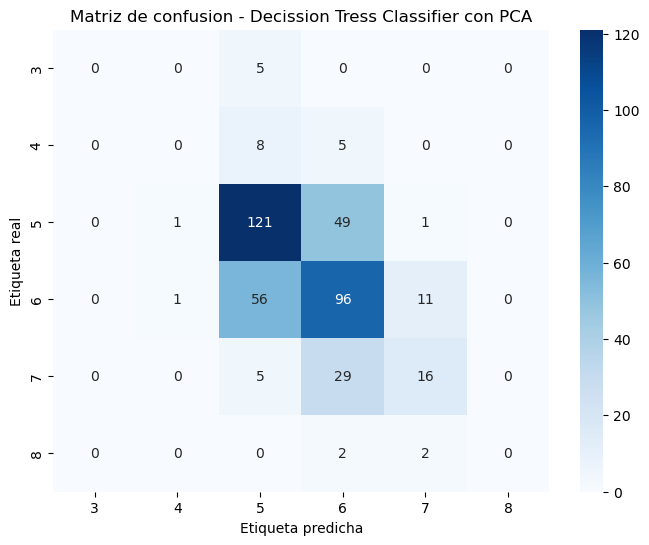

In [106]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion - Decission Tress Classifier con PCA")

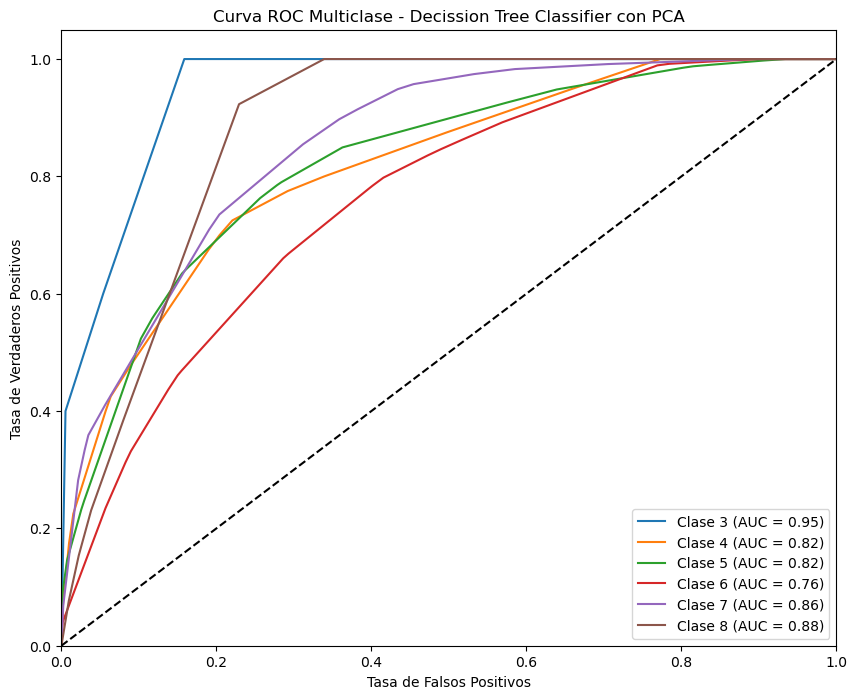

In [109]:
# curva roc para multiclase
# convertir a binario las etiquetas
y_train_bin = label_binarize(y_train, classes=classes) 
y_pred_prob = tree_model_pca.predict_proba(x_train_pca)

# graficar la curva 
plt.figure(figsize=(10, 8))

# curva roc para cada clase
for i in range(y_train_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_train_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Clase {classes[i]} (AUC = {roc_auc:.2f})')

# resultado
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Multiclase - Decission Tree Classifier con PCA')
plt.legend(loc='lower right')
plt.show()

Utilizando PCA para reducir a 4 componentes se observa que el modelo de arboles de decision mejora un poco. En la matriz de confusion se observa que las etiquetas predichas mejoran y con las curvas roc se observa tambien una mejora en algunas clases.